# Introduction to Scikit-learn (sklean)
This notebook demonstrates some of the most useful functions of the scikit-learn library

0. An end-to-end scikit-learn workflow
1. getting the data ready
2. choose the right estimator/algorithm for our problems
3. fit the model/algorithm and use it to make predictions on our data
4. evaluating a model
5. improvel a model
6. save and load a trained model
7. putting it all together

## 0. An end-to-end Scikit-Learn workflow

In [1]:
# standart imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("../Data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [5]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
# make a prediction
y_label = clf.predict(np.array([0, 2, 3, 4]))

C:\Users\T-Gamer\projects\Machine-Learning-and-Data-Science-Studies\sample_project_1\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [10]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
206,59,1,0,110,239,0,0,142,1,1.2,1,1,3
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2


In [11]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3


In [12]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [13]:
y_test

297    0
121    1
270    0
131    1
128    1
      ..
73     1
119    1
33     1
91     1
141    1
Name: target, Length: 61, dtype: int64

In [14]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [15]:
clf.score(X_test, y_test)

0.8360655737704918

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        23
           1       0.85      0.89      0.87        38

    accuracy                           0.84        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.84      0.83        61



In [18]:
confusion_matrix(y_test, y_preds)

array([[17,  6],
       [ 4, 34]], dtype=int64)

In [19]:
accuracy_score(y_test, y_preds)

0.8360655737704918

In [21]:
# 5. improve a model
# try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 81.97%

Trying model with 20 estimators...
Model accuracy on test set: 83.61%

Trying model with 30 estimators...
Model accuracy on test set: 81.97%

Trying model with 40 estimators...
Model accuracy on test set: 85.25%

Trying model with 50 estimators...
Model accuracy on test set: 90.16%

Trying model with 60 estimators...
Model accuracy on test set: 88.52%

Trying model with 70 estimators...
Model accuracy on test set: 86.89%

Trying model with 80 estimators...
Model accuracy on test set: 86.89%

Trying model with 90 estimators...
Model accuracy on test set: 85.25%



In [22]:
# 6. save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [23]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8524590163934426

## 1. Getting out data ready to be used with machine learning

Three main things we have to do:

    1. Split the data into features and labels (usually `X` & `y`)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [2]:
heart_disease = pd.read_csv("../Data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [5]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [7]:
X.shape

(303, 13)

In [8]:
len(heart_disease)

303

In [9]:
car_sales = pd.read_csv("../Data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [10]:
len(car_sales)

1000

In [11]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [12]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]
 
# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [13]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Honda'

In [16]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# the numbers of doors should be considered a categorical value, because we can divide
# the cars based on the amount of doors: 3 Doors car, 4 Doors car, etc
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [17]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [19]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


# One Hot Encoding
It transforms different categorical values into columns, and then set 1 if the line had them, or 0 if it hadn't

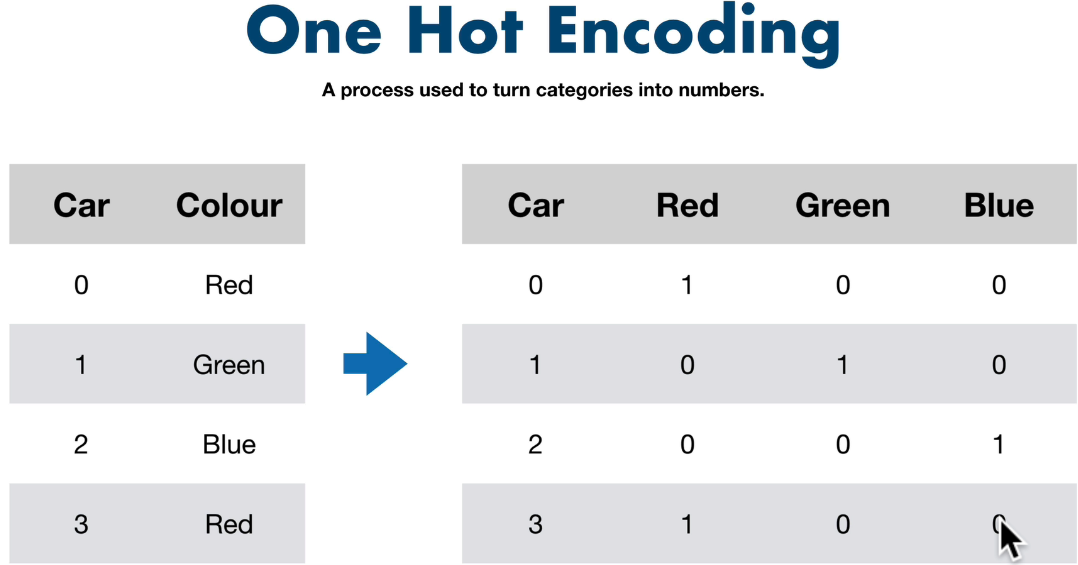

In [20]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [21]:
# refitting the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)


In [22]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3235867221569877

## 1.2 Hadling missing values

1. Fill them with some value (imputation).
2. Remove the samples with missing data altogether.


In [28]:
# Import car sales missing data
car_sales_missing = pd.read_csv("../Data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [29]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [30]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [31]:
# converting data to numbers
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [35]:
pd.DataFrame(transformed_X)

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."
...,...
995,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 12)\t1.0\n..."
996,"(0, 4)\t1.0\n (0, 9)\t1.0\n (0, 11)\t1.0\n..."
997,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 12)\t1.0\n..."
998,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."


#### Option 1: Fill missing data with Pandas

In [39]:
# Fill the "make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

car_sales_missing["Doors"].fillna(4, inplace=True)

In [40]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [41]:
car_sales_missing.dropna(inplace=True)

In [42]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [43]:
len(car_sales_missing)

950

In [45]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [47]:
# converting data to numbers
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(X)
pd.DataFrame(transformed_X.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0


In [ ]:
### Option 2: Fill missing values with Scikit-learn